



### MSACSR: 

Monthly Supply of New Houses in the United States 

Units : Count integer (Seasonally Adjusted). 

It indicates the monthly supply of new houses available in the United States.

https://fred.stlouisfed.org/series/MSACSR


### TLRESCONS:

Total Construction Spending: Residential in the United States 

Units : (Millions of Dollars, Seasonally Adjusted Annual Rate). 

This variable represents the total construction spending on residential projects.

https://fred.stlouisfed.org/series/TLRESCONS

### EVACANTUSQ176N: 

Housing Inventory Estimate: Vacant Housing Units in the United States

Units : Thousands of Units, Not Seasonally Adjusted. 

It provides an estimate of the number of vacant housing units in the United States.

https://fred.stlouisfed.org/series/EVACANTUSQ176N





In [18]:
import pandas as pd 

### COMPUTSA:

New Privately-Owned Housing Units Completed: 

Units: Thousands of Units, Seasonally Adjusted Annual Rate

https://fred.stlouisfed.org/series/COMPUTSA

In [19]:

df_COMPUTSA = pd.read_csv("supply/COMPUTSAq.csv")
print(df_COMPUTSA.head())
df_COMPUTSA.size

         DATE     COMPUTSA
0  2003-01-01  1660.000000
1  2003-04-01  1678.666667
2  2003-07-01  1656.333333
3  2003-10-01  1712.000000
4  2004-01-01  1740.333333


162

### CSUSHPISA: 
S&P/Case-Shiller U.S. National Home Price Index  

Units: Index Jan 2000=100, Seasonally Adjusted

This variable serves as a proxy for home prices and represents the home price index for the United States.

https://fred.stlouisfed.org/series/CSUSHPISA

In [20]:
df_CSUSHPISA = pd.read_csv("supply/CSUSHPISAq.csv")
print(df_CSUSHPISA.head())
df_CSUSHPISA.size

         DATE   CSUSHPISA
0  2003-01-01  129.320667
1  2003-04-01  131.755667
2  2003-07-01  135.013000
3  2003-10-01  138.834667
4  2004-01-01  143.298667


162

In [22]:
df_EVACANTUSQ176N = pd.read_csv("supply/EVACANTUSQ176Nq.csv")
df_EVACANTUSQ176N.head()
df_EVACANTUSQ176N.size

162

In [23]:
df_MSACSR = pd.read_csv("supply/MSACSRq.csv")
print(df_MSACSR.head())
df_MSACSR.size

         DATE    MSACSR
0  2003-01-01  4.200000
1  2003-04-01  3.833333
2  2003-07-01  3.633333
3  2003-10-01  3.966667
4  2004-01-01  3.700000


162


### PERMIT: 
New Privately-Owned Housing Units Authorized in Permit-Issuing Places:

Total Units :  (Thousands of Units). 

This variable represents the number of new housing units authorized for construction in permit-issuing places.

https://fred.stlouisfed.org/series/PERMIT

In [24]:
df_PERMIT = pd.read_csv("supply/PERMITq.csv")
print(df_PERMIT.head())
df_PERMIT.size

         DATE       PERMIT
0  2003-01-01  1806.333333
1  2003-04-01  1837.666667
2  2003-07-01  1937.333333
3  2003-10-01  1972.333333
4  2004-01-01  1994.666667


162

In [25]:
df_TLRESCONS = pd.read_csv("supply/TLRESCONSq.csv")
print(df_TLRESCONS.head())
df_TLRESCONS.size

         DATE      TLRESCONS
0  2003-01-01  421328.666667
1  2003-04-01  429308.666667
2  2003-07-01  458890.000000
3  2003-10-01  491437.333333
4  2004-01-01  506856.333333


162

In [26]:
merged_df = pd.merge(df_TLRESCONS, df_PERMIT, on="DATE", how="inner")
merged_df = pd.merge(merged_df, df_COMPUTSA, on="DATE", how="inner")
merged_df = pd.merge(merged_df, df_EVACANTUSQ176N, on="DATE", how="inner")
merged_df = pd.merge(merged_df, df_MSACSR, on="DATE", how="inner")
merged_df = pd.merge(merged_df, df_CSUSHPISA, on="DATE", how="inner")

In [27]:
merged_df.head()

,DATE,TLRESCONS,PERMIT,COMPUTSA,EVACANTUSQ176N,MSACSR,CSUSHPISA
0,2003-01-01,421328.666667,1806.333333,1660.000000,14908.0,4.200000,129.320667
1,2003-04-01,429308.666667,1837.666667,1678.666667,15244.0,3.833333,131.755667
2,2003-07-01,458890.000000,1937.333333,1656.333333,15614.0,3.633333,135.013000
3,2003-10-01,491437.333333,1972.333333,1712.000000,15654.0,3.966667,138.834667
4,2004-01-01,506856.333333,1994.666667,1740.333333,15895.0,3.700000,143.298667


In [28]:
merged_df.to_csv('supply.csv', index=False)

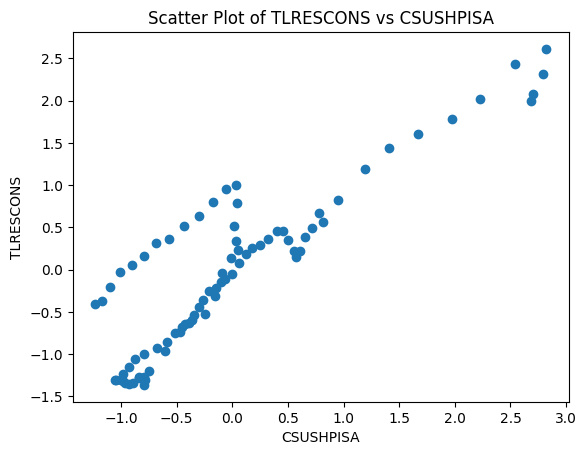

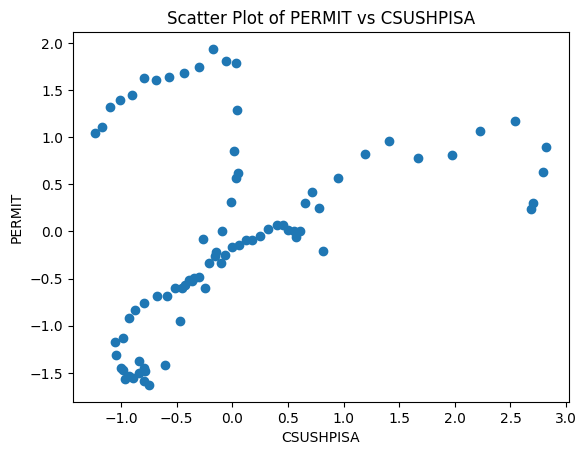

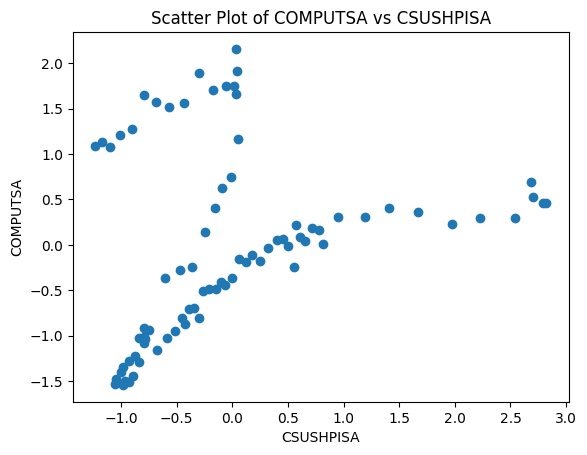

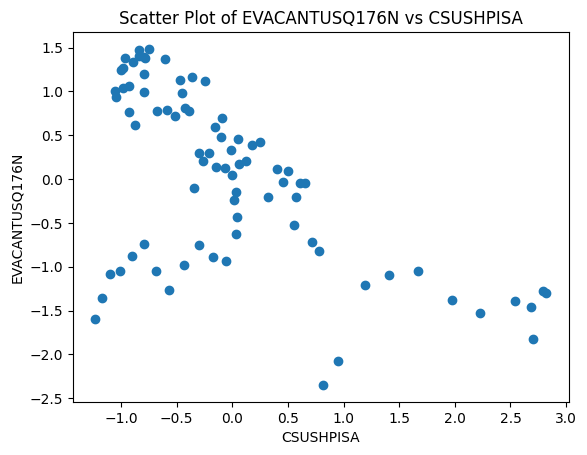

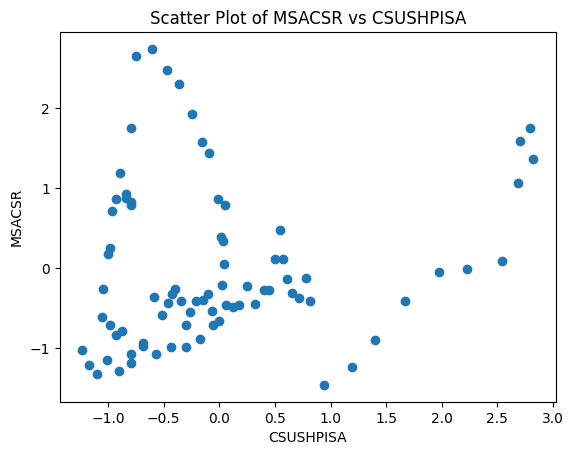

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with the mentioned columns
selected_columns = ['TLRESCONS', 'PERMIT', 'COMPUTSA', 'EVACANTUSQ176N', 'MSACSR', 'CSUSHPISA']

# Standardize the data (optional but can be helpful for visualization)
scaler = StandardScaler()
merged_df[selected_columns] = scaler.fit_transform(merged_df[selected_columns])

# Create scatter plots for each variable against 'CSUSHPISA'
for column in selected_columns[:-1]:  # Exclude 'CSUSHPISA' itself
    plt.scatter(merged_df['CSUSHPISA'], merged_df[column])
    plt.xlabel('CSUSHPISA')
    plt.ylabel(column)
    plt.title(f'Scatter Plot of {column} vs CSUSHPISA')
    plt.show()

In [29]:
selected_columns = ['TLRESCONS', 'PERMIT', 'COMPUTSA', 'EVACANTUSQ176N', 'MSACSR', 'CSUSHPISA']
correlation_with_target = merged_df[selected_columns].corr()['CSUSHPISA']
print(correlation_with_target)

TLRESCONS         0.891138
PERMIT            0.372613
COMPUTSA          0.280040
EVACANTUSQ176N   -0.604815
MSACSR            0.150796
CSUSHPISA         1.000000
Name: CSUSHPISA, dtype: float64
